# Проверка гипотез для увеличения выручки интернет-магазина

**Описание данных**

**Данные для первой части**
<br>Файл /datasets/hypothesis.csv :
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**
<br>Файл /datasets/orders.csv :
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv :
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Описание проекта**
<br>Мы проводим аналитику крупного интернет-магазина. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки. Требуется приоритизируйте гипотезы, запустить A/B-тест и проанализировать результаты. 

**Часть 1. Приоритизация гипотез.**
<br>В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
<br>Задача
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста.**
<br>Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
<br>Задача
Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. - Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
  1. Остановить тест, зафиксировать победу одной из групп.
  2. Остановить тест, зафиксировать отсутствие различий между группами.
  3. Продолжить тест.

**Обзор и предобработка данных**

Рассмотрим данные поближе:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings

from scipy import stats as st

In [2]:
try:
    hypothesis, orders, visitors = (
                            pd.read_csv('hypothesis.csv'),
                            pd.read_csv('orders.csv'),
                            pd.read_csv('visitors.csv')
                            )
except:
    hypothesis, orders, visitors = (
                            pd.read_csv('/datasets/hypothesis.csv'),
                            pd.read_csv('/datasets/orders.csv'),
                            pd.read_csv('/datasets/visitors.csv')
                            )

In [3]:
#увеличим ширину столбцов, чтобы гипотезы отображались полностью
pd.options.display.max_colwidth = 1

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Присутствуют нарушения стиля в названии столбцов, а так же несоотвествие типа данных в столбцах, в которых обозначена дата.
<br>Предобработаем данные и проверим их на наличие дубликатов:

In [10]:
hypothesis.columns = hypothesis.columns.str.lower()

In [11]:
orders = orders.rename(columns={'transactionId':'transaction_id', 
                                'visitorId':'visitor_id'})
orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [13]:
print(f'Дубликаты hypothesis: {hypothesis.duplicated().sum()}')
print(f'Дубликаты orders: {orders.duplicated().sum()}')
print(f'Дубликаты visitors: {visitors.duplicated().sum()}')

Дубликаты hypothesis: 0
Дубликаты orders: 0
Дубликаты visitors: 0


В итоге мы исправели нарушения стиля в названии столбцов, а так же несоотвествие типа данных в столбцах, в которых обозначена дата. Дубликаты в данных отсутствуют. Можно приступить к основной части.

**Часть 1. Приоритизация гипотез.**

In [14]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим метод ICE для приоритизации гипотез
<br>Его формула:
</ul></div><br>$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [15]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis.sort_values(by = 'ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


А теперь применим метод RICE
<br>Его формула:
</ul></div> <br>$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [16]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


**Вывод**

По методу ICE наиболее приоритетными были гипотезы(топ-3):
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

По методу RICE расклад иной(топ-3):
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Видим разницу в приоритезиций гипотез. Это произошло потому что по методу RICE учитывается параметр Reach, т.е. скольких пользователей затронет изменение, которое мы хотим внести.

**Часть 2. Анализ A/B-теста.**

Сначала проверим - есть ли пересечения пользователей между обеими группами теста

In [17]:
len(orders.loc[orders['visitor_id'].isin(orders[orders['group']=='A']['visitor_id']) & 
               orders['visitor_id'].isin(orders[orders['group']=='B']['visitor_id']),'visitor_id'].unique())

58

Пересечения между группами все же есть: 58 пользователей попали в обе группы.

In [18]:
print('А:', orders.query('group == "A"')['visitor_id'].nunique())
print('В:', orders.query('group == "B"')['visitor_id'].nunique())

А: 503
В: 586


Исходя из кол-ва пользователей в каждой группе - получаем, что около 10% пользователей пересекаются
<br>Результаты исследования могут быть немного искажены, но мы можем продолжать исследование

Подготовим данные для расчетов:

In [19]:
dates_group = orders[['date','group']].drop_duplicates()

In [20]:
orders_group = dates_group.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                    orders['group'] == x['group'])]
    .agg({'date' : 'max',
          'group' : 'max',
          'transaction_id' : 'nunique',
          'visitor_id' : 'nunique',
          'revenue' : 'sum'}), 
    axis=1).sort_values(by=['date','group'])

orders_group.head(8)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567


In [21]:
visitors_group = dates_group.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                      visitors['group'] == x['group'])]
    .agg({'date': 'max',
          'group': 'max',
          'visitors': 'sum'}),axis=1,
).sort_values(by=['date', 'group'])

visitors_group.head(8)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573


In [22]:
cumulative_data = orders_group.merge(
    visitors_group, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [23]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head(8)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
5,2019-08-03,B,61,59,380996,1803,0.033833
6,2019-08-04,A,84,77,425699,2562,0.032787
7,2019-08-04,B,78,75,489567,2573,0.030315


In [24]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

Данные подготовлены, теперь можно приступить к рассчетам

**1. Кумулятивная выручка по группам**

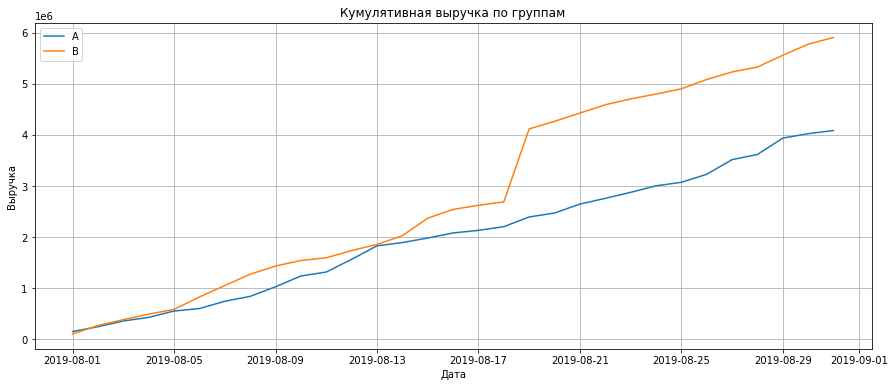

In [25]:
plt.figure(figsize=(15,6))
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'], 
         label='A')
plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue'], 
         label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.grid()
plt.legend()
plt.show()

Мы видим, что кумулятивная выручка группы В растет выше, чем у группы А, анчиная с 05.08. При этом видим скачок у группы В в районе 18-го августа. Скорее-всего просто были крупные заказы, либо их число сильно увеличилось.

**2. Кумулятивный средний чек по группам**

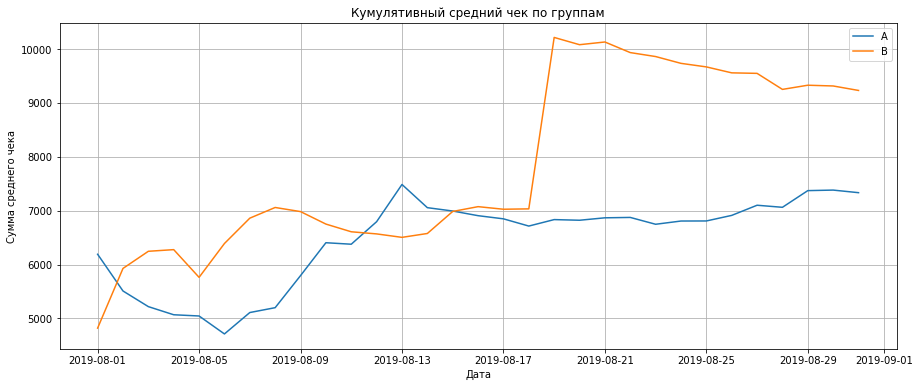

In [26]:
plt.figure(figsize=(15,6))
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'], 
         label='A')
plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], 
         label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel("Дата")
plt.ylabel("Сумма среднего чека")
plt.grid()
plt.legend()
plt.show()

Как и ожидалось - версия с крупными заказами подтвердилась: по графику средний чек группы В показал резкий рывок как раз в районе 18 числа. Средний чек группы А сначала имел небольшой спад с последующим ростом, а уже после середины месяца стал достаточно стабильным

**3. Относительное изменение кумулятивного среднего чека группы В к группе А**

Соберем данные в одном датафрейме

In [27]:
merged_cumulative_revenue = (cumulative_revenue_a
                             .merge(cumulative_revenue_b,
                                    left_on='date',
                                    right_on='date',
                                    how='left',
                                    suffixes=['_a', '_b']))
merged_cumulative_revenue.head(5)

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


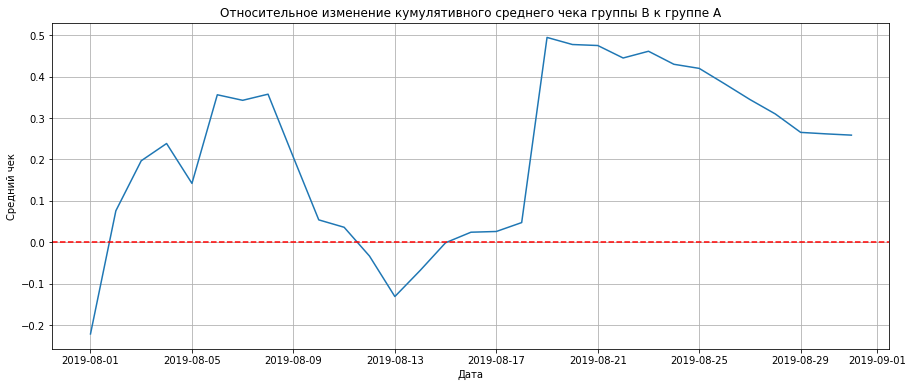

In [28]:
plt.figure(figsize=(15,6))
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenue_b'] / merged_cumulative_revenue['orders_b']) / 
         (merged_cumulative_revenue['revenue_a'] / merged_cumulative_revenue['orders_a'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.axhline(y=0, color='red', linestyle='--')
plt.grid()
plt.show()

Кумулятивная выручка группы В все-таки выше, чем у группы А, но в нескольких точках график резко скачет. Это значит - есть крупные заказы и выбросы.

**4. Кумулятивное среднее кол-во заказов на посетителя по группам**

In [29]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

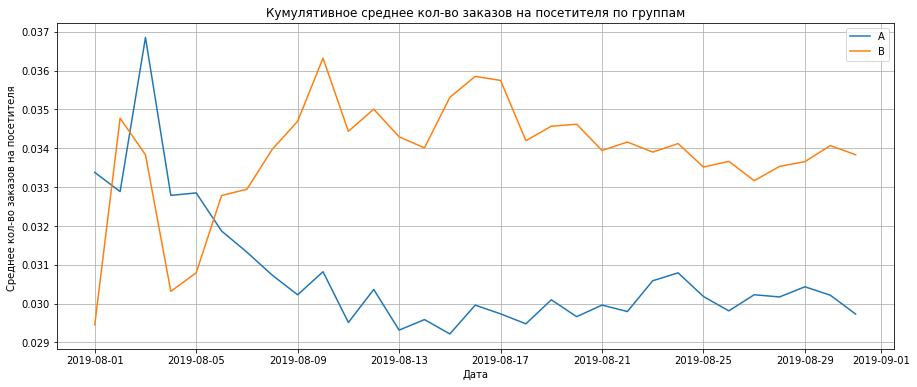

In [30]:
plt.figure(figsize=(15,6))
plt.plot(cumulative_data_a['date'], 
         cumulative_data_a['conversion'], 
         label='A');
plt.plot(cumulative_data_b['date'], 
         cumulative_data_b['conversion'], 
         label='B');
plt.title('Кумулятивное среднее кол-во заказов на посетителя по группам')
plt.xlabel("Дата")
plt.ylabel("Среднее кол-во заказов на посетителя ")
plt.grid()
plt.legend()
plt.show()

Сначала графики среднего кол-ва заказов были нестабильны и скакали, но довольно быстро более-менее выровнялись. Среднее кол-во заказов группы А было сначала сильно выше чем у группы В, но на шестой день ситуация сменилась на противоположную.

**5. Относительное изменение среднего кол-ва заказов на посетителя группы B к группе А**

In [31]:
merged_cumulative_conversions = (cumulative_data_a[['date','conversion']]
                                 .merge(cumulative_data_b[['date','conversion']],
                                        left_on='date', 
                                        right_on='date',
                                        how='left',
                                        suffixes=['_a', '_b']))
merged_cumulative_conversions.head(6)     

,date,conversion_a,conversion_b
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793
5,2019-08-06,0.031870,0.032783


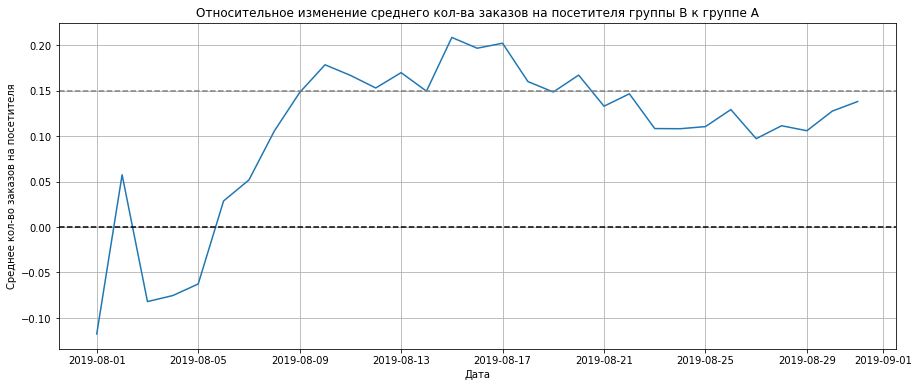

In [32]:
plt.figure(figsize=(15,6))
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversion_b'] / merged_cumulative_conversions['conversion_a']-1)
plt.title('Относительное изменение среднего кол-ва заказов на посетителя группы B к группе А')
plt.ylabel('Среднее кол-во заказов на посетителя')
plt.xlabel("Дата")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.grid()
plt.show()

Среднее кол-во заказов на посетителя группы В стремительно растет, обгоняя группу А на 6-й день, после 20-го числа оно медленно пошло на спад, но в конце снова наблюдаетсяя рост.

**6. Точечный график количества заказов пользователей**

In [33]:
orders_per_user = (orders.drop(['group', 'revenue', 'date'], axis=1)
                   .groupby('visitor_id', as_index=False)
                   .agg({'transaction_id' : 'nunique'})
                  )
orders_per_user.columns = ['visitor_id','orders']
orders_per_user.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


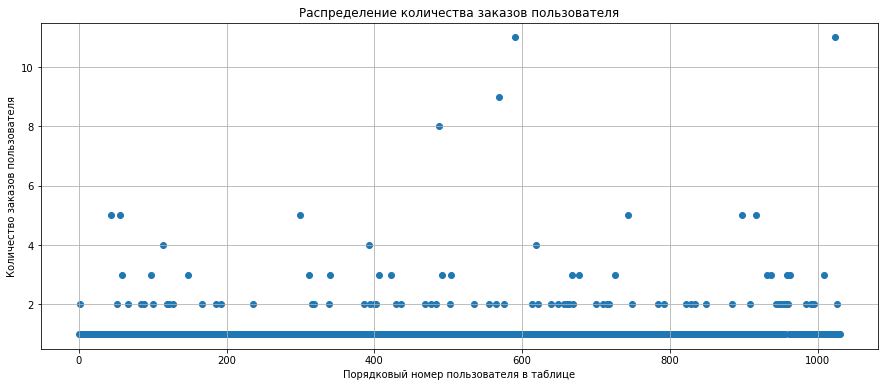

In [34]:
plt.figure(figsize=(15,6))
plt.scatter(pd.Series(range(0,len(orders_per_user['orders']))), 
            orders_per_user['orders'])
plt.title('Распределение количества заказов пользователя')
plt.ylabel('Количество заказов пользователя')
plt.xlabel('Порядковый номер пользователя в таблице')
plt.grid()
plt.show()

Подавляющее большинство пользователей сделали по одному заказу. Много пользователей с 2-мя заказами. Куда реже - 3 и более

**7. Выбор границы для определения аномальных пользователей**

In [35]:
print(np.percentile(orders_per_user['orders'], [95, 99]))

[2. 4.]


Пользователй, совершивших больше 2-х покупок не более 5%. Тех, кто совершил 4 и более покупок - не более 1%.
<br>Примем за верхнюю границу 3 заказа на одного пользователя.

**8. Точечный график стоимости заказов**

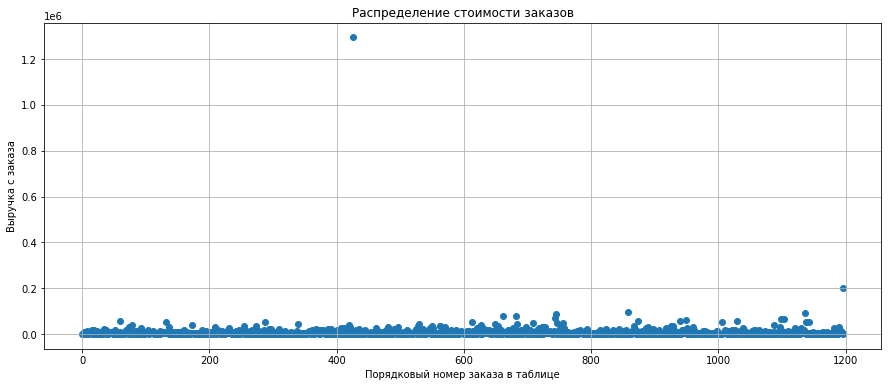

In [36]:
plt.figure(figsize=(15,6))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.ylabel('Выручка с заказа')
plt.xlabel('Порядковый номер заказа в таблице')
plt.grid()
plt.show()

Видим как минимум один очень крупный заказ в районе 1.3 миллиона
<br>Выведем дополнительно точечный график распределение стоимости заказов до 250 тысяч

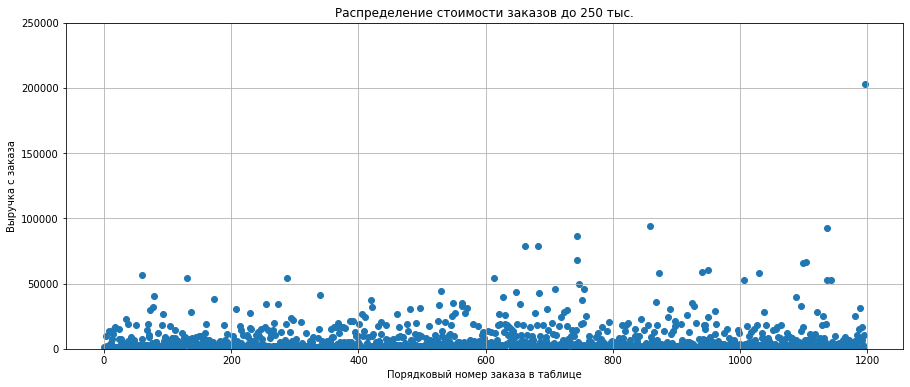

In [37]:
plt.figure(figsize=(15,6))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue'])
plt.title('Распределение стоимости заказов до 250 тыс.')
plt.ylabel('Выручка с заказа')
plt.xlabel('Порядковый номер заказа в таблице')
plt.ylim(0,250000)
plt.grid()
plt.show()

У подавляющего большинства пользователей в обоих группах сумма заказа не более 25 тыс. рублей.
Есть несколько заказов вырочкой от 25 до 60 тысяч и совсем единичные заказы на сумму более 60 тысяч с одним неплохим на сумму в примерно 210-220 тысяч.

**9. Выбор границы для определения аномальных заказов**

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Определим границу по аномальной стоимости заказов как 99% перцентиль, т.е. 58 233 у.е.

**10. Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами. "Сырые" данные**

Подготовим сырые данные:

In [39]:
visitors_daily_A = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_daily_A.columns = ['date', 'visitors_per_date_A']

visitors_daily_B = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_daily_B.columns = ['date', 'visitors_per_date_B']


visitors_cummulative_A = visitors_daily_A.apply(lambda x: 
                            visitors_daily_A[visitors_daily_A['date'] <= x['date']].agg({
                                'date' : 'max', 
                                'visitors_per_date_A' : 'sum'}), axis=1)
visitors_cummulative_A.columns = ['date', 'visitors_cummulative_A']

visitors_cummulative_B = visitors_daily_B.apply(lambda x: 
                            visitors_daily_B[visitors_daily_B['date'] <= x['date']].agg({
                                'date' : 'max', 
                                'visitors_per_date_B' : 'sum'}), axis=1)
visitors_cummulative_B.columns = ['date', 'visitors_cummulative_B']

In [40]:
orders_daily_A = orders[orders['group']=='A'][['date', 'transaction_id',
                                               'visitor_id', 'revenue']].groupby(
    'date', as_index=False).agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})
orders_daily_A.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

orders_daily_B = orders[orders['group']=='B'][['date', 'transaction_id',
                                               'visitor_id', 'revenue']].groupby(
    'date', as_index=False).agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})
orders_daily_B.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']


orders_cummulative_A = orders_daily_A.apply(
    lambda x: orders_daily_A[orders_daily_A['date'] <= x['date']].agg({
                'date' : 'max',
                'orders_per_date_A' : 'sum',
                'revenue_per_date_A' : 'sum'}), axis=1).sort_values(by=['date'])
orders_cummulative_A.columns = ['date', 'orders_сummulative_A', 'revenue_сummulative_A']

orders_cummulative_B = orders_daily_B.apply(
    lambda x: orders_daily_B[orders_daily_B['date'] <= x['date']].agg({
                'date' : 'max',
                'orders_per_date_B' : 'sum',
                'revenue_per_date_B' : 'sum'}), axis=1).sort_values(by=['date'])
orders_cummulative_B.columns = ['date', 'orders_сummulative_B', 'revenue_сummulative_B']

In [41]:
data = (visitors_daily_A
        .merge(visitors_daily_B, left_on='date', right_on='date', how='left')
        .merge(visitors_cummulative_A, left_on='date', right_on='date', how='left')
        .merge(visitors_cummulative_B, left_on='date', right_on='date', how='left')
        .merge(orders_daily_A, left_on='date', right_on='date', how='left')
        .merge(orders_daily_B, left_on='date', right_on='date', how='left')
        .merge(orders_cummulative_A, left_on='date', right_on='date', how='left')
        .merge(orders_cummulative_B, left_on='date', right_on='date', how='left')
       )

In [42]:
orders_by_visitors_A = orders[orders['group']=='A'].groupby(
    'visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})

orders_by_visitors_A.columns = ['visitor_id', 'orders']

orders_by_visitors_B = orders[orders['group']=='B'].groupby(
    'visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})

orders_by_visitors_B.columns = ['visitor_id', 'orders']

sample_A = pd.concat([orders_by_visitors_A['orders'],
                     pd.Series(0, index=np.arange(
                         data['visitors_per_date_A'].sum() -
                         len(orders_by_visitors_A['orders'])),
                               name='orders')],axis=0)

sample_B = pd.concat([orders_by_visitors_B['orders'],
                     pd.Series(0, index=np.arange(
                         data['visitors_per_date_B'].sum() -
                         len(orders_by_visitors_B['orders'])), 
                               name='orders')],axis=0)

Сфорулируем нулевую и альтернативную гипотезы:
<br>H0: статистически значимых различий в среднем количестве заказов на посетителя между группами нет
<br>H1: статистически значимые различия в среднем количестве заказов на посетителя между группами есть

<br>Уровень статистической значимости alpha = 0.05.
<br>Будем использовать критерий Манна-Уитни

In [43]:
print('Значение p-value для среднего кол-ва заказов на посетителя: {:.3f}'.format(st.mannwhitneyu(sample_A, sample_B)[1]))

alpha = 0.05
if st.mannwhitneyu(sample_A, sample_B)[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Относительный прирост среднего кол-ва заказов на посетителя у группы B: {:.2%}'.format((sample_B.mean()/sample_A.mean()) - 1))

Значение p-value для среднего кол-ва заказов на посетителя: 0.017
Отвергаем нулевую гипотезу
Относительный прирост среднего кол-ва заказов на посетителя у группы B: 13.81%


Нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет, отвергаем.

**11. Cтатистическая значимость различий в среднем чеке заказа. "Сырые" данные**

Сфорулируем нулевую и альтернативную гипотезы:
<br>H0: различий в среднем чеке групп нет
<br>H1: различия в среднем чеке групп есть

<br>Уровень статистической значимости alpha = 0.05.
<br>Также пользуемся критерием Манна-Уитни

In [44]:
pvalue_mean_check = st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]

print('Значение p-value для среднего чека: {:.3f}'.format(pvalue_mean_check))

alpha = 0.05
if pvalue_mean_check < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост среднего чека группы B: {:.2%}'
        .format((orders.query('group == "B"')['revenue'].mean() / orders.query('group == "A"')['revenue'].mean()) - 1))

Значение p-value для среднего чека: 0.729
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B: 25.87%


Отвергнуть нулевую гипотезу о том, что нету значимых различий в среднем чеке групп не удалось
<br>Однако, относительное различие среднего чека между группами по «сырым» данным почти 26%, что показывает влияние аномально-дорогих заказов

**12. Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами. "Очищенные" данные**

Подготовим очищенные данные
<br>Создадим таблицы с аномальными пользователей и выведем их количество и долю

In [45]:
orders_threshold = 3
revenue_threshold = int(np.percentile(orders['revenue'], 99))

In [46]:
visitors_many_orders = pd.concat([orders_by_visitors_A[orders_by_visitors_A['orders'] > orders_threshold]['visitor_id'], 
                                  orders_by_visitors_B[orders_by_visitors_B['orders'] > orders_threshold]['visitor_id']], axis = 0)

visitors_expensive_orders = orders[orders['revenue'] > revenue_threshold]['visitor_id']

abnormal_visitors = (pd.concat([visitors_many_orders, visitors_expensive_orders], axis = 0)
                     .drop_duplicates()
                     .sort_values()
                    )

print('Количество аномальных пользователей:',len(abnormal_visitors))
print('Доля аномальных пользователей {:.2%}'.format(len(abnormal_visitors) / len(orders['visitor_id'].unique())))

Количество аномальных пользователей: 20
Доля аномальных пользователей 1.94%


Доля аномальных пользователей - мене 2% (20 шт.) - приемлимо.
<br>Создадим таблицы с количеством заказов по пользователям для каждой группы без аномальных пользователей

In [47]:
sample_A_filt = pd.concat(
                    [orders_by_visitors_A[np.logical_not(orders_by_visitors_A['visitor_id']
                            .isin(abnormal_visitors))]['orders'],
                            pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - 
                            len(orders_by_visitors_A['orders'])),
                            name='orders')],
                            axis=0
                         )

sample_B_filt = pd.concat(
                    [orders_by_visitors_B[np.logical_not(orders_by_visitors_B['visitor_id']
                           .isin(abnormal_visitors))]['orders'],
                           pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() - 
                           len(orders_by_visitors_B['orders'])),
                           name='orders')],
                           axis=0
                         )

Сфорулируем нулевую и альтернативную гипотезы:
<br>H0: статистически значимых различий в среднем количестве заказов на посетителя между группами нет
<br>H1: статистически значимые различия в среднем количестве заказов на посетителя между группами есть

<br>Уровень статистической значимости alpha = 0.05.
<br>Будем использовать критерий Манна-Уитни

In [48]:
print('Значение p-value для среднего кол-ва заказов на посетителя: {:.3f}'.format(st.mannwhitneyu(sample_A_filt, sample_B_filt)[1]))

alpha = 0.05
if st.mannwhitneyu(sample_A_filt, sample_B_filt)[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост среднего кол-ва заказов на посетителя у группы B: {:.2%}'.format((sample_B_filt.mean() / sample_A_filt.mean()) - 1))

Значение p-value для среднего кол-ва заказов на посетителя: 0.014
Отвергаем нулевую гипотезу
Относительный прирост среднего кол-ва заказов на посетителя у группы B: 15.10%


На очищенных данных разница в среднем количестве заказов на посетителя между группами все так же есть, но относительный прирост группы В отностельно группы А увеличился до 15.10%.

**13. Cтатистическая значимость различий в среднем чеке заказа. "Очищенные" данные**

Сфорулируем нулевую и альтернативную гипотезы:
<br>H0: различий в среднем чеке групп нет
<br>H1: различия в среднем чеке групп есть

<br>Уровень статистической значимости alpha = 0.05.
<br>Также пользуемся критерием Манна-Уитни

In [49]:
filtered_pvalue_mean_check = st.mannwhitneyu(
    orders[np.logical_and(orders['group'] == "A", 
                          np.logical_not(orders['visitor_id']
                                         .isin(abnormal_visitors)))]['revenue'],
    orders[np.logical_and(orders['group'] == "B", 
                          np.logical_not(orders['visitor_id']
                                         .isin(abnormal_visitors)))]['revenue'])[1]

print('Значение p-value для среднего чека: {:.3f}'.format(filtered_pvalue_mean_check))

alpha = 0.05
if filtered_pvalue_mean_check < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

    
print('Относительный прирост среднего чека группы B: {:.2%}'.format(
    (orders[np.logical_and(orders['group']=='B', 
                           np.logical_not(orders['visitor_id']
                                          .isin(abnormal_visitors)))]['revenue'].mean()/
orders[np.logical_and(orders['group']=='A', 
                           np.logical_not(orders['visitor_id']
                                          .isin(abnormal_visitors)))]['revenue'].mean()) - 1))

Значение p-value для среднего чека: 0.959
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B: -1.39%


P-value значительно больше 0.05. Значит, нулевую гипотезу не отвергаем, следовательно различий в среднем чеке групп нет.
<br>Относительный прирост среднего чека группы В на очищенных данных сильно упал до -1.39%, раньше на неочищенных данных он составлял 25.87%

**14. Принятие решения по результатам теста**

Мы предобработали полученные данные и проверели наличие дубликатов в них.
Провели приоретизацию гипотез по методам ICE и RICE
<br>Напомним, что по методу ICE наиболее приоритетными были гипотезы(топ-3):
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

По методу RICE расклад был получен иной(топ-3):
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

После приоретизации гипотез мы провели анализ результатов A/B-теста и пришли к следующим выводам:
- Среднее кол-во заказов на посетителя группы B выше, чем у группы А, начиная с 5 дня, что привело к большему числу заказов и немного размыло средний чек.
- С середины месяца динамика среднего кол-ва заказов на посетителя обеих групп пришла в баланс. Группа В показала больший уровень среднего, нежели группа А.
- Кумулятивная выручка у группы В выше, чем у группы А.
- Были совершены довольно крупные заказы, что подняло средний чек.
- Большая часть клиентов совершали не более 2-х заказов. Выручка от заказов в больешй своей части не превышала 60 тыс. у.е.
- Статистические значимые различия в среднем количестве заказов на посетителя между группами теста есть, как на сырых, так и на отфильтрованных данных.
- Статистических значимых различий в среднем чеке между группами теста нету и на сырых, и на отфильтрованных данных, хоть крупные(аномальные) заказы в случае неочищенных данных сильно искажали результат(относительная разница суммы среднего чека между группами составила -1.39% (против 25.87% по сырым данным).

По результатам теста приходим к следующему решению: 
<br>***Тест остановить, зафиксировать отсутствие различий между группами по сумме среднего чека и победу группы В в части повышенного среднего количества заказов на посетителя.***